# Project 19 Restaurant Food Cost Prediction
--> Aim is to predict the food cost of a restuarnt based on the given data

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [218]:
Rst_trn=pd.read_excel('Data_Test.xlsx')

In [219]:
Rst_trn.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [220]:
Rst_tst=pd.read_excel('Data_Train.xlsx')

In [221]:
Rst_tst.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [222]:
Rst_trn['DATA']='test'
Rst_tst['DATA']='train'
Rst_trn["COST"]=0

In [223]:
data=pd.concat([Rst_trn,Rst_tst])

In [224]:
data.head()

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Noida,0,"North Indian, Chinese, Mughlai, Kebab",test,Sector 18,4.3,4085,12noon – 12midnight (Mon-Sun),CASUAL DINING,564 votes
1,Mumbai,0,"South Indian, Fast Food, Pizza, North Indian",test,Grant Road,4.2,12680,7am – 12:30AM (Mon-Sun),QUICK BITES,61 votes
2,Mumbai,0,"North Indian, Seafood, Biryani, Chinese",test,Marine Lines,3.8,1411,11am – 11:30pm (Mon-Sun),CASUAL DINING,350 votes
3,Faridabad,0,Biryani,test,NIT,3.8,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",None,1445 votes
4,Kochi,0,"South Indian, Kerala",test,Kaloor,3.6,13453,11am – 10pm (Mon-Sun),QUICK BITES,23 votes


In [225]:
data.shape

(16921, 10)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [227]:
data.isnull().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [228]:
data['CITY'].value_counts()

Chennai                 2855
Bangalore               2835
Hyderabad               2458
Mumbai                  2311
New Delhi               1754
                        ... 
Near Reliance Fresh        1
Mumbai Chakala             1
Semmancheri                1
Naya Nagar Mira Road       1
Kerala 682018              1
Name: CITY, Length: 450, dtype: int64

In [229]:
data['VOTES'].unique()

array(['564 votes', '61 votes', '350 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [230]:
data['VOTES'].fillna('0',inplace=True)

In [231]:
data['VOTES']=data['VOTES'].str.split(' ').str[0].astype(int)

In [232]:
data['VOTES'].unique()

array([ 564,   61,  350, ..., 2723, 1426, 1214], dtype=int64)

In [233]:
data['LOCALITY'].value_counts().head()

Gachibowli     216
Indiranagar    187
Kakkanad       175
Kukatpally     171
Madhapur       169
Name: LOCALITY, dtype: int64

In [234]:
data['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [235]:
data['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', nan, '2.0'], dtype=object)

In [236]:
data['RATING'].replace('NEW',1,inplace=True)

In [237]:
data['RATING'].replace('-',0,inplace=True)

In [238]:
data['RATING'].fillna(0,inplace=True)

In [239]:
data['RATING'].isnull().sum()

0

In [240]:
data['RATING']=data['RATING'].astype(float)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null int32
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 1.4+ MB


In [242]:
data['CITY'].fillna('none',inplace=True)

In [243]:
data['LOCALITY'].fillna('none',inplace=True)

In [244]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

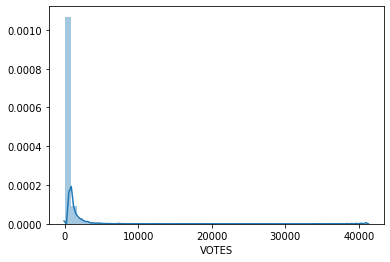

In [245]:
sns.distplot(data['VOTES'])

In [246]:
data['VOTES']=data['VOTES']+5
from scipy.stats import boxcox
data['VOTES']=boxcox(data['VOTES'],0)

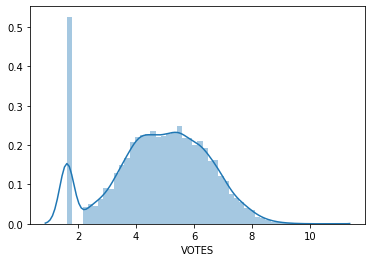

In [247]:
sns.distplot(data['VOTES'])

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 10 columns):
CITY             16921 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16921 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.4+ MB


In [249]:
data['CUISINES'].unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [250]:
data['CUISINES1']=data['CUISINES'].str.split(',').str[0]
data['CUISINES2']=data['CUISINES'].str.split(',').str[1]
data['CUISINES3']=data['CUISINES'].str.split(',').str[2]
data['CUISINES4']=data['CUISINES'].str.split(',').str[3]
data['CUISINES5']=data['CUISINES'].str.split(',').str[4]

In [251]:
data['CUISINES2'].fillna('None',inplace=True)
data['CUISINES3'].fillna('None',inplace=True)
data['CUISINES4'].fillna('None',inplace=True)
data['CUISINES5'].fillna('None',inplace=True)

In [252]:
data['CUISINES1']=le.fit_transform(data['CUISINES1'])
data['CUISINES2']=le.fit_transform(data['CUISINES2'])
data['CUISINES3']=le.fit_transform(data['CUISINES3'])
data['CUISINES4']=le.fit_transform(data['CUISINES4'])
data['CUISINES5']=le.fit_transform(data['CUISINES5'])

In [253]:
data.drop(['CUISINES'],axis=1, inplace=True)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 14 columns):
CITY             16921 non-null object
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
dtypes: float64(2), int32(5), int64(2), object(5)
memory usage: 1.6+ MB


In [255]:
data['TITLE'].head(100)

0     CASUAL DINING
1       QUICK BITES
2     CASUAL DINING
3              None
4       QUICK BITES
          ...      
95      QUICK BITES
96    CASUAL DINING
97    CASUAL DINING
98           LOUNGE
99    CASUAL DINING
Name: TITLE, Length: 100, dtype: object

In [256]:
data['TITLE'].unique()

array(['CASUAL DINING', 'QUICK BITES', 'None',
       'FOOD TRUCK,DESSERT PARLOR', 'DESSERT PARLOR,QUICK BITES',
       'CASUAL DINING,BAR', 'LOUNGE', 'BEVERAGE SHOP',
       'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB', 'CAFÉ', 'BAKERY',
       'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING',
       'BAKERY,CASUAL DINING', 'BAR', 'FOOD COURT',
       'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,CAFÉ', 'MESS', 'BAR,CASUAL DINING',
       'BEVERAGE SHOP,CAFÉ', 'BEVERAGE SHOP,DESSERT PARLOR',
       'PUB,FINE DINING', 'CASUAL DINING,FOOD COURT',
       'CAFÉ,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       

In [257]:
data['TITLE'].value_counts()

QUICK BITES                 5634
CASUAL DINING               4910
None                        1287
CAFÉ                         830
DESSERT PARLOR               508
                            ... 
BAKERY,FOOD COURT              1
CLUB,MICROBREWERY              1
BEVERAGE SHOP,FOOD COURT       1
QUICK BITES,FOOD TRUCK         1
QUICK BITES,BAR                1
Name: TITLE, Length: 123, dtype: int64

In [258]:
data['TITLE1']=data['TITLE'].str.split(',').str[0]
data['TITLE2']=data['TITLE'].str.split(',').str[1]

In [259]:
data['TITLE2'].fillna('None',inplace=True)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 16 columns):
CITY             16921 non-null object
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null object
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
TITLE1           16921 non-null object
TITLE2           16921 non-null object
dtypes: float64(2), int32(5), int64(2), object(7)
memory usage: 1.9+ MB


In [261]:
data.drop(['TITLE'],axis=1,inplace=True)

In [262]:
data.drop(['TIME'],axis=1,inplace=True)

In [263]:
data.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [264]:
data['TITLE1']=le.fit_transform(data['TITLE1'])
data['TITLE2']=le.fit_transform(data['TITLE2'])

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 13 columns):
CITY         16921 non-null object
COST         16921 non-null int64
DATA         16921 non-null object
LOCALITY     16921 non-null object
RATING       16921 non-null float64
VOTES        16921 non-null float64
CUISINES1    16921 non-null int32
CUISINES2    16921 non-null int32
CUISINES3    16921 non-null int32
CUISINES4    16921 non-null int32
CUISINES5    16921 non-null int32
TITLE1       16921 non-null int32
TITLE2       16921 non-null int32
dtypes: float64(2), int32(7), int64(1), object(3)
memory usage: 1.4+ MB


In [266]:
Trainfinal=data.loc[data['DATA']=='Train']
Testfinal=data.loc[data['DATA']=='Test']

In [267]:
Trainfinal.drop(['DATA'],axis=1,inplace=True)
Testfinal.drop(['DATA'],axis=1,inplace=True)
Trainfinal.head()
Testfinal.head()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
